In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/데이터/Salary_Data.csv", index_col = None, header=0)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [70]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [71]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

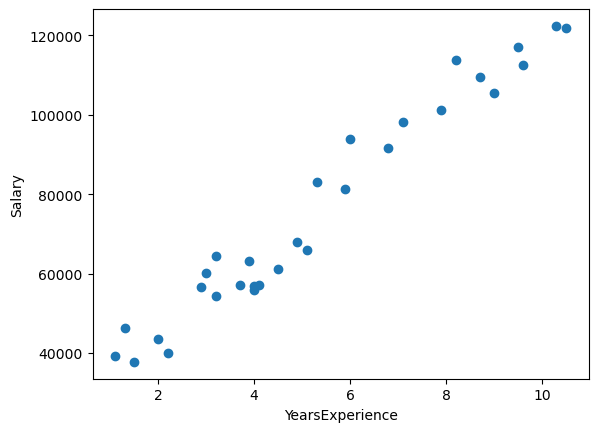

In [72]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()

In [73]:
y=dataset.Salary.values
x=dataset.drop('Salary',axis=1)

In [74]:
X = dataset['Salary']

y = dataset['YearsExperience']

In [75]:
X.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [76]:
y.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [77]:
X = X.to_numpy()
y = y.to_numpy()

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [79]:
X_train = X_train.reshape(-1, 1)
X_test =  X_test.reshape(-1, 1)

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = regressor.predict(X_test) 
y_pred

array([1.372477  , 9.85265035, 3.31071648, 3.9254439 , 9.30954262,
       8.55448065, 8.87541705, 3.18180101])

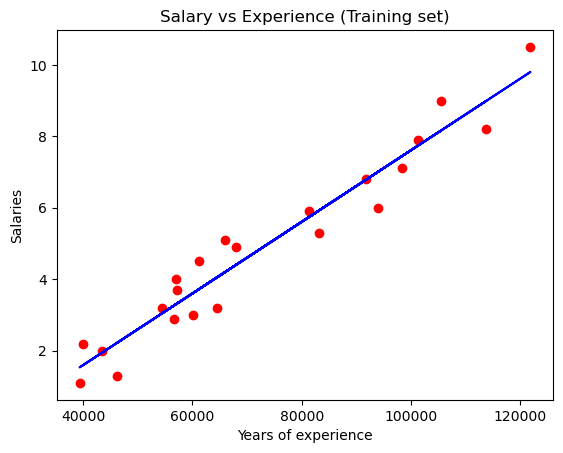

In [82]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

In [83]:
regressor.score(X_test, y_test)

0.974376290571024

In [84]:
#여기 바뀜
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)
train_poly = pd.concat([df_train ** 2, df_train], axis=1)
test_poly = pd.concat([df_test ** 2, df_test], axis=1)

In [85]:
print(train_poly.shape, test_poly.shape)

(22, 2) (8, 2)


In [86]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [87]:
print(lr.coef_, lr.intercept_)

[7.28872825e-11 8.87738670e-05] -2.006423627577629


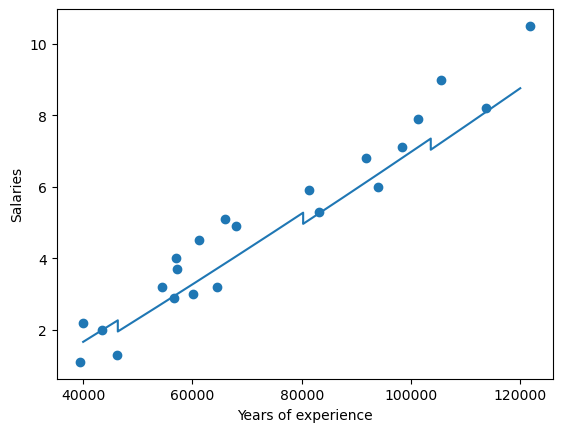

In [88]:
point = np.arange(40000, 120000)
# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()

In [89]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
y_prediction = lr.predict(test_poly)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

0.37010254372632323
